1️⃣ Import Required Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2️⃣ Load the Dataset

In [18]:
df = pd.read_csv("customer_churn_dataset.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


3️⃣ Understand the Dataset

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


4️⃣ Handle Duplicate Rows

In [20]:
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

print("After removal:", df.duplicated().sum())

Duplicate rows: 0
After removal: 0


5️⃣ Handle Missing Age Values

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].median())

6️⃣ Fix Inconsistent Gender Formats

In [22]:
df['Gender'] = df['Gender'].str.strip().str.lower()

df['Gender'] = df['Gender'].replace({
    'm': 'male',
    'f': 'female'
})

Check result

In [23]:
df['Gender'].value_counts()

Gender
male      250252
female    190580
Name: count, dtype: int64

7️⃣ Handle Salary Outliers

Step 1: Visualize Outliers

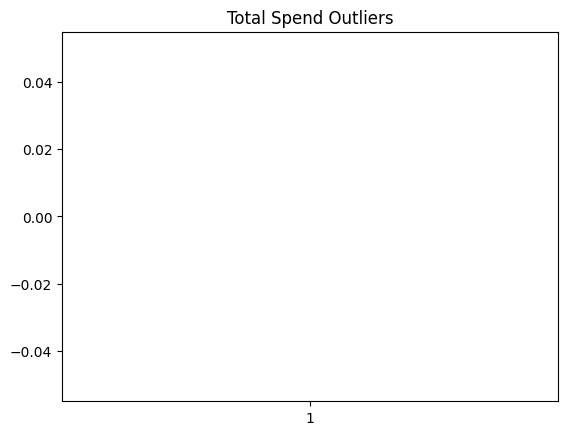

In [24]:
plt.boxplot(df['Total Spend'])
plt.title("Total Spend Outliers")
plt.show()

Step 2: Use IQR Method

In [25]:
Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Total Spend'] >= lower_bound) & 
        (df['Total Spend'] <= upper_bound)]

8️⃣ Encode Categorical Variables (ML Ready)

In [26]:
df = pd.get_dummies(df, drop_first=True)

9️⃣ Final Validation

In [27]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  440832 non-null  float64
 1   Age                         440832 non-null  float64
 2   Tenure                      440832 non-null  float64
 3   Usage Frequency             440832 non-null  float64
 4   Support Calls               440832 non-null  float64
 5   Payment Delay               440832 non-null  float64
 6   Total Spend                 440832 non-null  float64
 7   Last Interaction            440832 non-null  float64
 8   Churn                       440832 non-null  float64
 9   Gender_male                 440832 non-null  bool   
 10  Subscription Type_Premium   440832 non-null  bool   
 11  Subscription Type_Standard  440832 non-null  bool   
 12  Contract Length_Monthly     440832 non-null  bool   
 13  Contract Length_Qua

CustomerID                    0
Age                           0
Tenure                        0
Usage Frequency               0
Support Calls                 0
Payment Delay                 0
Total Spend                   0
Last Interaction              0
Churn                         0
Gender_male                   0
Subscription Type_Premium     0
Subscription Type_Standard    0
Contract Length_Monthly       0
Contract Length_Quarterly     0
dtype: int64

🔟 Save Clean Dataset

In [28]:
df.to_csv("clean_customer_churn.csv", index=False)